In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action="ignore", category=FutureWarning)

In [2]:
banking = pd.read_csv("Data/banking3.csv", index_col=0)
banking

,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4.866,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,4.860,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41185,4.857,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
41186,0.742,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
X = banking.drop(columns="y")
y = banking["y"]

In [5]:
y.value_counts() / len(y)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
RF_model = RandomForestClassifier(
    n_estimators=1000, random_state=1, max_features=None, max_depth=None
)

RF_model.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=1000, random_state=1)

In [16]:
RF_y_pred = RF_model.predict(X_test)
confusion_matrix_res = confusion_matrix(y_test, RF_y_pred)
print(confusion_matrix_res)
print(classification_report(y_test, RF_y_pred))

[[10682   299]
 [  974   402]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10981
           1       0.57      0.29      0.39      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [25]:
preds_RF = RF_model.predict_proba(X_test)
preds_RF_0 = preds_RF[:,0]
preds_RF_1 = preds_RF[:,1]

fpr, tpr, thresholds = roc_curve(y_test, preds_RF_1)
roc_auc_RF = auc(fpr, tpr)
print(f"AUC: {roc_auc_RF}")

AUC: 0.7713693962404408


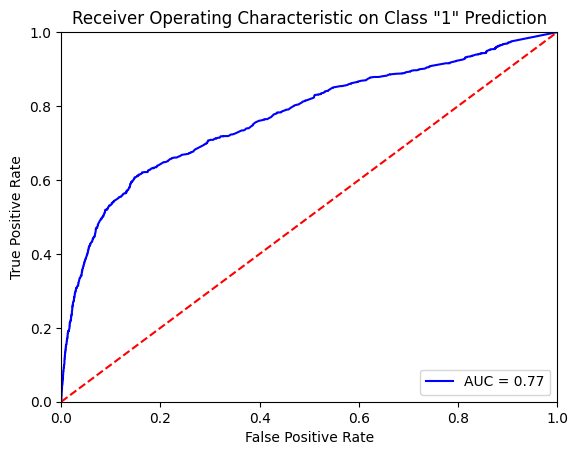

In [33]:
plt.title('Receiver Operating Characteristic on Class "1" Prediction')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
importances = RF_model.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)

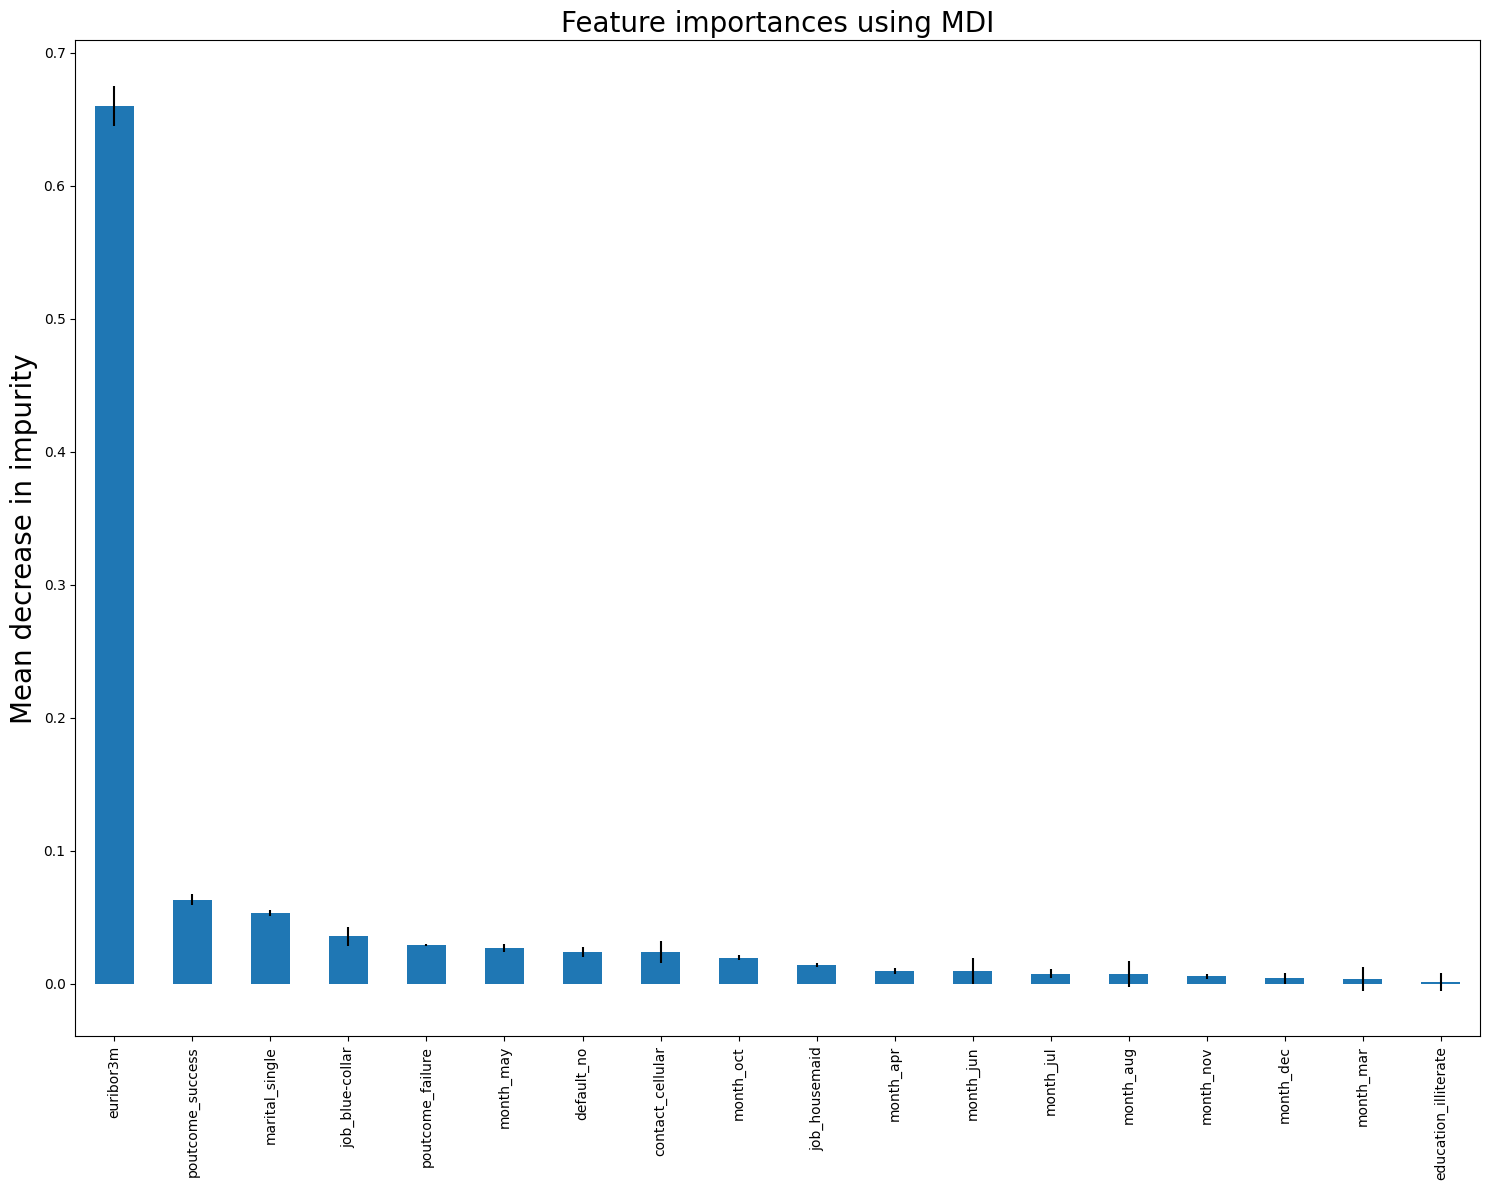

In [11]:
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
forest_importances.plot.bar(yerr=std, ax=ax) 
### thin line indicates 1 std err from the mean either way -- doesn't mean mean decrease is neg
ax.set_title("Feature importances using MDI",fontsize=20)  ### MDI is mean decrease in impurity 
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.set(xticks=([i for i in range(len(X.columns))]))
### define own x-ticks to avoid clutter, entry must be a list
fig.tight_layout()

In [32]:
banking.corr()['y']

euribor3m              -0.307771
job_blue-collar        -0.074423
job_housemaid          -0.006505
marital_single          0.054133
education_illiterate    0.007246
default_no              0.099344
contact_cellular        0.144773
month_apr               0.076136
month_aug              -0.008813
month_dec               0.079303
month_jul              -0.032230
month_jun              -0.009182
month_mar               0.144014
month_may              -0.108271
month_nov              -0.011796
month_oct               0.137366
poutcome_failure        0.031799
poutcome_success        0.316269
y                       1.000000
Name: y, dtype: float64